File 1: 22.502761840820312 sec
File 2: 22.92392897605896 sec
File 3: 22.626286506652832 sec
File 4: 23.0531964302063 sec


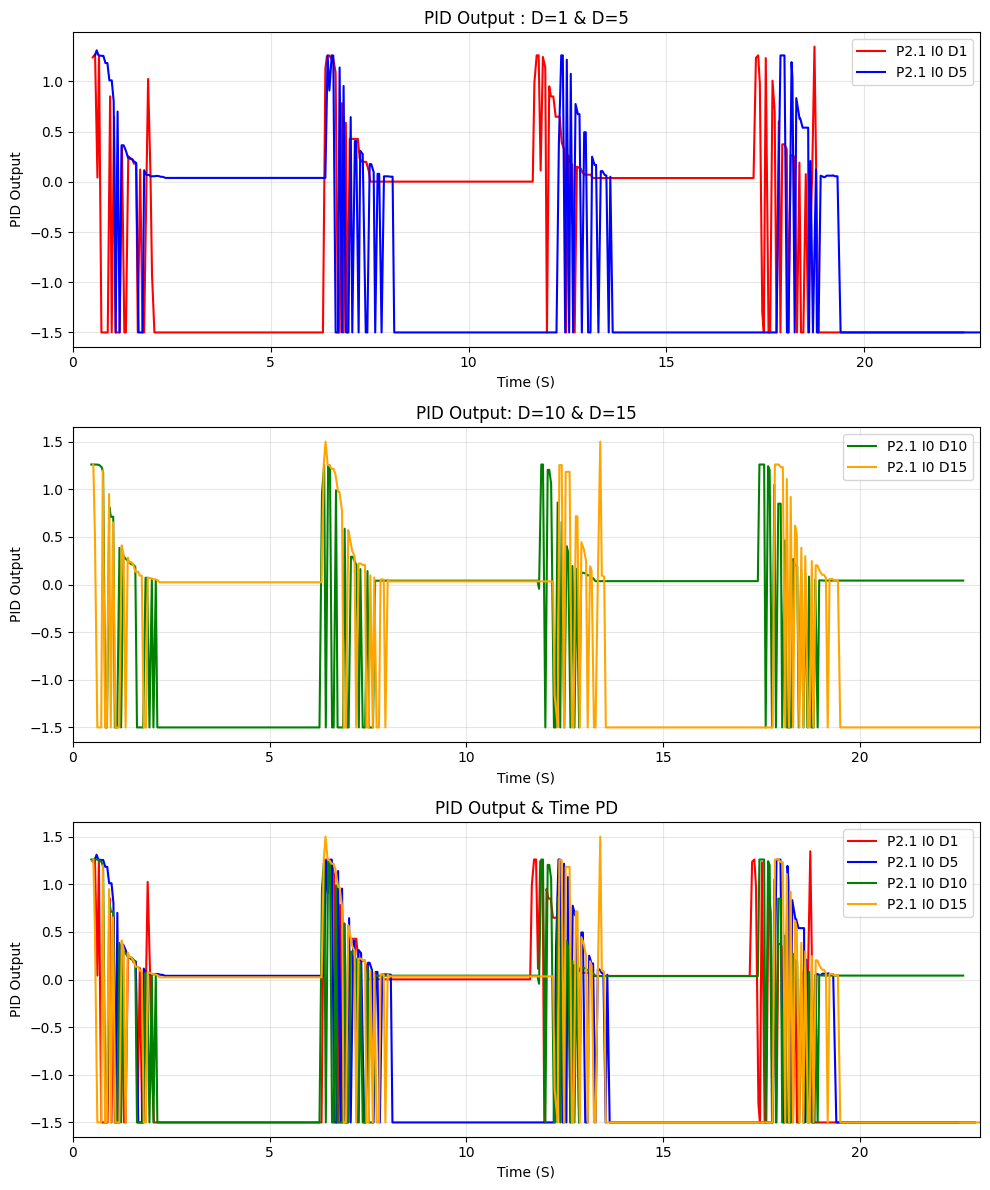


Summary:
File 1: 22.5 s, 440 points
File 2: 22.9 s, 434 points
File 3: 22.6 s, 442 points
File 4: 23.1 s, 452 points


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดไฟล์ CSV ทั้ง 4 ไฟล์
file1 = r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_30_33_P2-1_I0_D1_ramp0.csv " 
file2 = r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_31_06_P2-1_I0_D5_ramp0.csv "  
file3 = r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_32_55_P2-1_I0_D10_ramp0.csv"
file4 = r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_33_49_P2-1_I0_D15_ramp0.csv "

# อ่านไฟล์และแปลงเวลา (นับจาก 0)
df1 = pd.read_csv(file1)
df1['time_sec'] = df1['time'] - df1['time'].iloc[0]

df2 = pd.read_csv(file2)
df2['time_sec'] = df2['time'] - df2['time'].iloc[0]

df3 = pd.read_csv(file3)
df3['time_sec'] = df3['time'] - df3['time'].iloc[0]

df4 = pd.read_csv(file4)
df4['time_sec'] = df4['time'] - df4['time'].iloc[0]

# Debug: ตรวจสอบช่วงเวลา
print("File 1:", df1['time_sec'].max(), "sec")
print("File 2:", df2['time_sec'].max(), "sec")
print("File 3:", df3['time_sec'].max(), "sec")
print("File 4:", df4['time_sec'].max(), "sec")

# หาเวลาสูงสุดของทุกไฟล์
max_time_all = max(df1['time_sec'].max(), df2['time_sec'].max(),
                df3['time_sec'].max(), df4['time_sec'].max())

# สร้าง subplot 3 แถว
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Subplot 1: ไฟล์ที่ 1 และ 2
ax1.plot(df1['time_sec'], df1['pid_output'], 'r', label='P2.1 I0 D1')
ax1.plot(df2['time_sec'], df2['pid_output'], 'b', label='P2.1 I0 D5')
ax1.set_xlim(0, max(df1['time_sec'].max(), df2['time_sec'].max()))
ax1.set_xlabel("Time (S)")
ax1.set_ylabel("PID Output")
ax1.set_title("PID Output : D=1 & D=5")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: ไฟล์ที่ 3 และ 4
ax2.plot(df3['time_sec'], df3['pid_output'], 'g', label='P2.1 I0 D10')
ax2.plot(df4['time_sec'], df4['pid_output'], 'orange', label='P2.1 I0 D15')
ax2.set_xlim(0, max(df3['time_sec'].max(), df4['time_sec'].max()))
ax2.set_xlabel("Time (S)")
ax2.set_ylabel("PID Output")
ax2.set_title("PID Output: D=10 & D=15")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Subplot 3: รวมทุกไฟล์
ax3.plot(df1['time_sec'], df1['pid_output'], 'r', label='P2.1 I0 D1')
ax3.plot(df2['time_sec'], df2['pid_output'], 'b', label='P2.1 I0 D5')
ax3.plot(df3['time_sec'], df3['pid_output'], 'g', label='P2.1 I0 D10')
ax3.plot(df4['time_sec'], df4['pid_output'], color='orange', label='P2.1 I0 D15')
ax3.set_xlim(0, max_time_all)
ax3.set_xlabel("Time (S)")
ax3.set_ylabel("PID Output")
ax3.set_title("PID Output & Time PD")
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# แสดงสถิติ
print("\nSummary:")
print(f"File 1: {df1['time_sec'].max():.1f} s, {len(df1)} points")
print(f"File 2: {df2['time_sec'].max():.1f} s, {len(df2)} points")
print(f"File 3: {df3['time_sec'].max():.1f} s, {len(df3)} points")
print(f"File 4: {df4['time_sec'].max():.1f} s, {len(df4)} points")


File 1: 22.502761840820312 sec
File 2: 22.92392897605896 sec
File 3: 22.626286506652832 sec
File 4: 23.0531964302063 sec


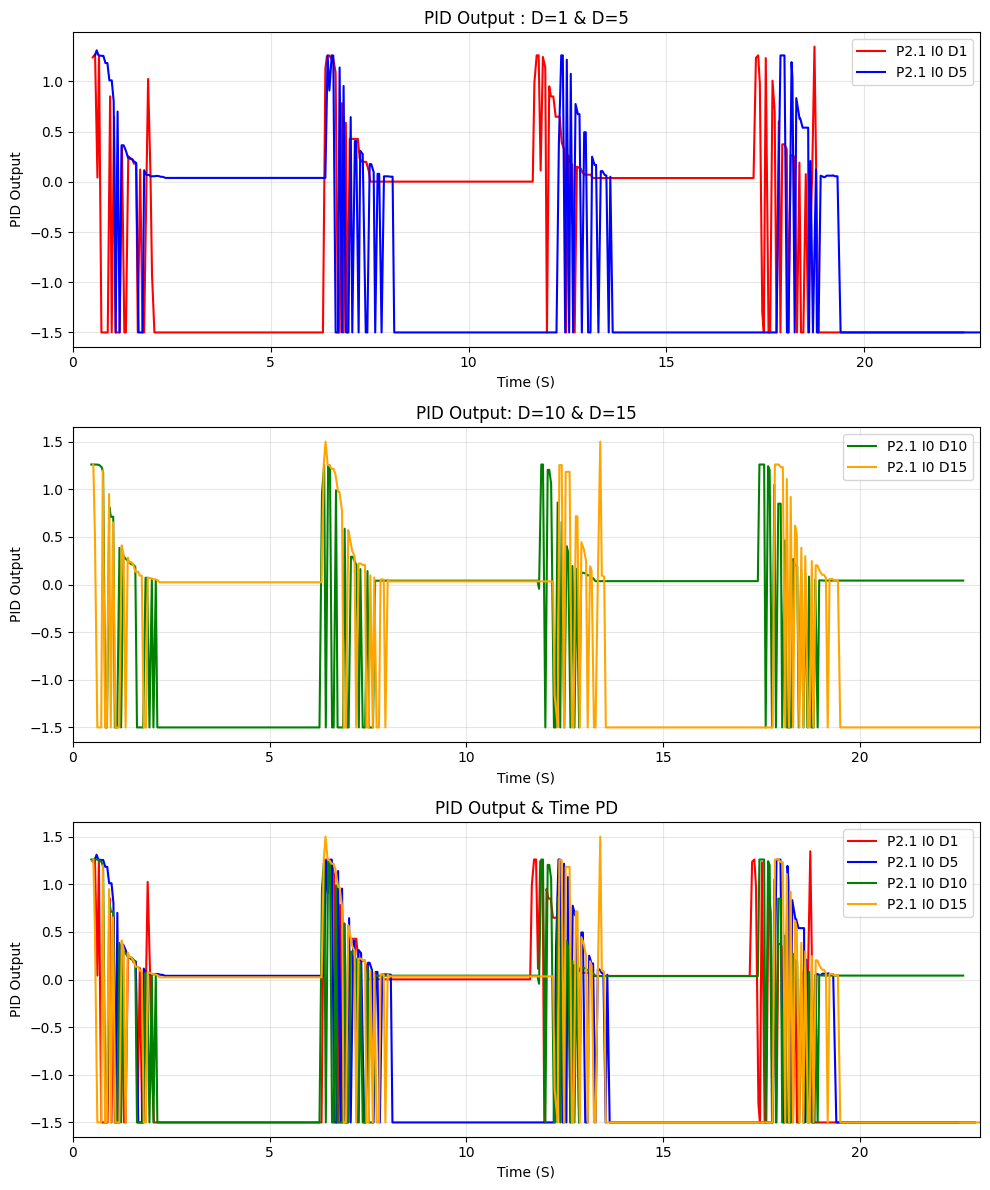

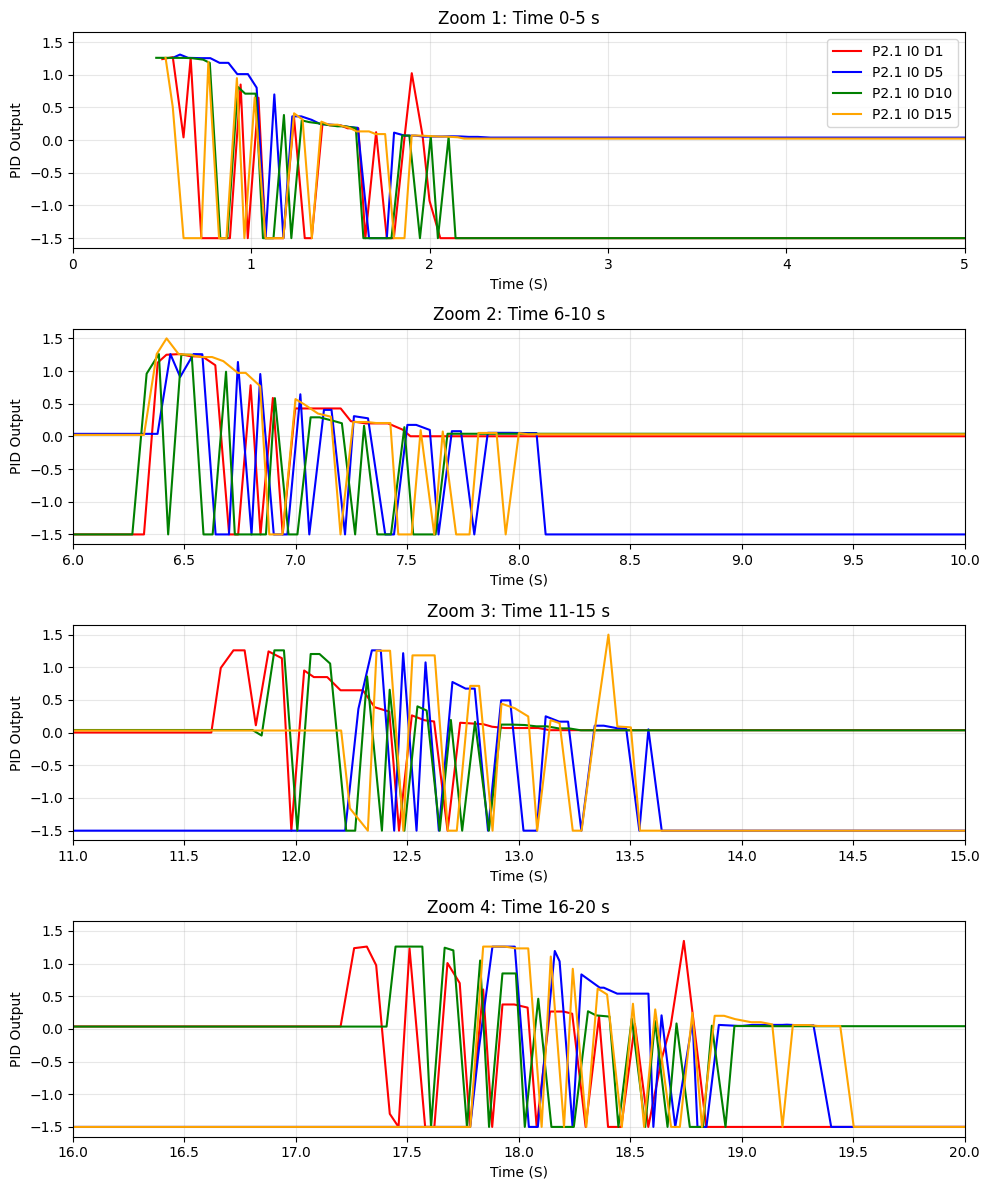


Summary:
File 1: 22.5 s, 440 points
File 2: 22.9 s, 434 points
File 3: 22.6 s, 442 points
File 4: 23.1 s, 452 points


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# โหลดไฟล์ CSV ทั้ง 4 ไฟล์
file1 = r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_30_33_P2-1_I0_D1_ramp0.csv"
file2 = r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_31_06_P2-1_I0_D5_ramp0.csv"
file3 = r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_32_55_P2-1_I0_D10_ramp0.csv"
file4 = r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_33_49_P2-1_I0_D15_ramp0.csv"

# อ่านไฟล์และสร้างคอลัมน์ time_sec
def load_and_adjust_time(filepath):
    df = pd.read_csv(filepath)
    df['time_sec'] = df['time'] - df['time'].iloc[0]
    return df

df1 = load_and_adjust_time(file1)
df2 = load_and_adjust_time(file2)
df3 = load_and_adjust_time(file3)
df4 = load_and_adjust_time(file4)

# Debug: ตรวจสอบช่วงเวลา
print("File 1:", df1['time_sec'].max(), "sec")
print("File 2:", df2['time_sec'].max(), "sec")
print("File 3:", df3['time_sec'].max(), "sec")
print("File 4:", df4['time_sec'].max(), "sec")

# หาเวลาสูงสุดของทุกไฟล์
max_time_all = max(df1['time_sec'].max(),
                df2['time_sec'].max(),
                df3['time_sec'].max(),
                df4['time_sec'].max())

# --------------------
# สร้าง subplot 3 แถวแรก
# --------------------
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Subplot 1
ax1.plot(df1['time_sec'], df1['pid_output'], 'r', label='P2.1 I0 D1')
ax1.plot(df2['time_sec'], df2['pid_output'], 'b', label='P2.1 I0 D5')
ax1.set_xlim(0, max(df1['time_sec'].max(), df2['time_sec'].max()))
ax1.set_xlabel("Time (S)")
ax1.set_ylabel("PID Output")
ax1.set_title("PID Output : D=1 & D=5")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2
ax2.plot(df3['time_sec'], df3['pid_output'], 'g', label='P2.1 I0 D10')
ax2.plot(df4['time_sec'], df4['pid_output'], color='orange', label='P2.1 I0 D15')
ax2.set_xlim(0, max(df3['time_sec'].max(), df4['time_sec'].max()))
ax2.set_xlabel("Time (S)")
ax2.set_ylabel("PID Output")
ax2.set_title("PID Output: D=10 & D=15")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Subplot 3 (รวมทุกไฟล์)
ax3.plot(df1['time_sec'], df1['pid_output'], 'r', label='P2.1 I0 D1')
ax3.plot(df2['time_sec'], df2['pid_output'], 'b', label='P2.1 I0 D5')
ax3.plot(df3['time_sec'], df3['pid_output'], 'g', label='P2.1 I0 D10')
ax3.plot(df4['time_sec'], df4['pid_output'], color='orange', label='P2.1 I0 D15')
ax3.set_xlim(0, max_time_all)
ax3.set_xlabel("Time (S)")
ax3.set_ylabel("PID Output")
ax3.set_title("PID Output & Time PD")
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --------------------
# สร้าง subplot ซูม 4 ช่วงเวลา
# --------------------
fig_zoom, zoom_axes = plt.subplots(4, 1, figsize=(10, 12), sharey=True)

# ช่วงเวลาที่ต้องการซูม
time_ranges = [(0, 5), (6, 10), (11, 15), (16, 20)]

for i, (start_t, end_t) in enumerate(time_ranges):
    ax = zoom_axes[i]
    ax.plot(df1['time_sec'], df1['pid_output'], 'r', label='P2.1 I0 D1')
    ax.plot(df2['time_sec'], df2['pid_output'], 'b', label='P2.1 I0 D5')
    ax.plot(df3['time_sec'], df3['pid_output'], 'g', label='P2.1 I0 D10')
    ax.plot(df4['time_sec'], df4['pid_output'], color='orange', label='P2.1 I0 D15')
    ax.set_xlim(start_t, end_t)
    ax.set_xlabel("Time (S)")
    ax.set_ylabel("PID Output")
    ax.set_title(f"Zoom {i+1}: Time {start_t}-{end_t} s")
    ax.grid(True, alpha=0.3)
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()

# แสดงสถิติ
print("\nSummary:")
print(f"File 1: {df1['time_sec'].max():.1f} s, {len(df1)} points")
print(f"File 2: {df2['time_sec'].max():.1f} s, {len(df2)} points")
print(f"File 3: {df3['time_sec'].max():.1f} s, {len(df3)} points")
print(f"File 4: {df4['time_sec'].max():.1f} s, {len(df4)} points")


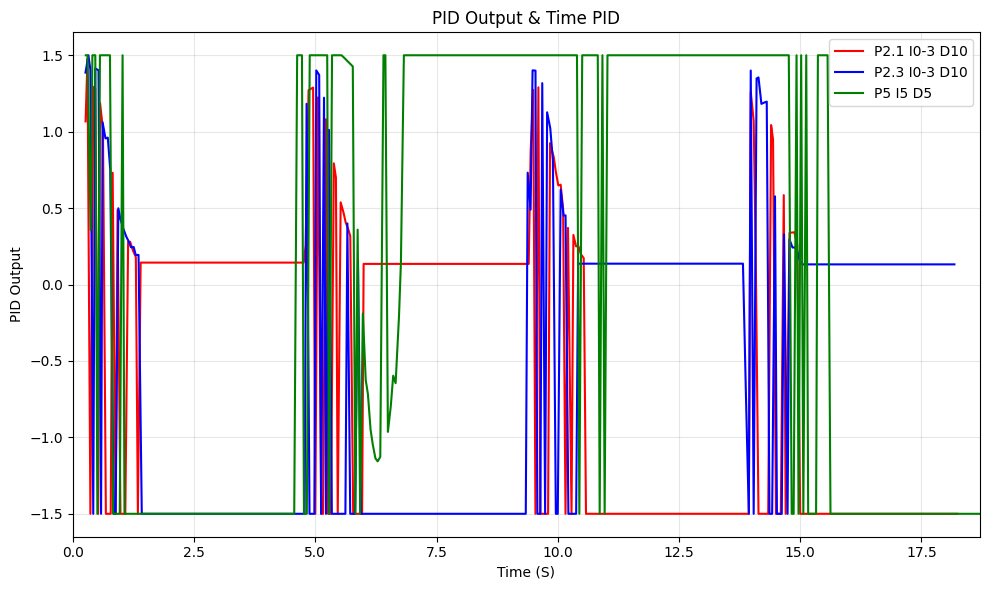


Summary:
File 1: 18.240190505981445 , 358 points
File 2: 18.17986297607422 , 355 points
File 3: 18.707892179489136 , 367 points


: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดไฟล์ CSV (ใส่ path เอง)
file1 = r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_45_22_P2-1_I0-3_D10_ramp0.csv"
file2 = r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_57_02_P2-3_I0-3_D10_ramp0.csv"  
file3 = r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_50_07_P5_I5_D5_ramp0.csv"

# อ่านไฟล์และแปลงเวลา (นับจาก 0 โดยไม่เปลี่ยนหน่วย)
df1 = pd.read_csv(file1)
df1['time_sec'] = df1['time'] - df1['time'].iloc[0]

df2 = pd.read_csv(file2)
df2['time_sec'] = df2['time'] - df2['time'].iloc[0]

df3 = pd.read_csv(file3)
df3['time_sec'] = df3['time'] - df3['time'].iloc[0]

# หาเวลาสูงสุดของทุกไฟล์
max_time_all = max(df1['time_sec'].max(), df2['time_sec'].max(), df3['time_sec'].max())

# Plot รวม
plt.figure(figsize=(10, 6))
plt.plot(df1['time_sec'], df1['pid_output'], label='P2.1 I0-3 D10', color='red')
plt.plot(df2['time_sec'], df2['pid_output'], label='P2.3 I0-3 D10', color='blue')
plt.plot(df3['time_sec'], df3['pid_output'], label='P5 I5 D5', color='green')

plt.xlim(0, max_time_all)
plt.xlabel("Time (S)")
plt.ylabel("PID Output")
plt.title("PID Output & Time PID")  # ใส่ชื่อกราฟเอง
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# แสดงสถิติ
print("\nSummary:")
print(f"File 1: {df1['time_sec'].max()} , {len(df1)} points")
print(f"File 2: {df2['time_sec'].max()} , {len(df2)} points")
print(f"File 3: {df3['time_sec'].max()} , {len(df3)} points")
